In [4]:
import pandas as pd

df_ads = pd.read_csv('data.csv')
df_ads.head()

点赞数     转发数  热度指数  文章评级     浏览量
0  2646  1347.0     7     5  260004
1   816   816.0     4     6  100004
2  1224   612.0     6     5  164502
3  1261  1261.0     6     6  163001
4  1720  1720.0     7     5  260401

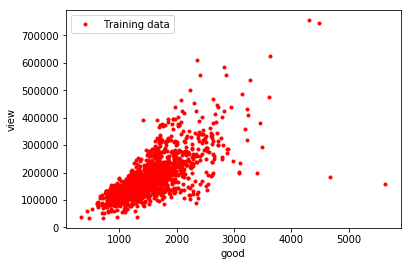

In [13]:
# 观察散点图，存在线性关系？
import matplotlib.pyplot as plt

plt.plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='Training data')
plt.xlabel('good')
plt.ylabel('view')
plt.legend()
plt.show()


(-0.5, 9.5, 0, 800000)

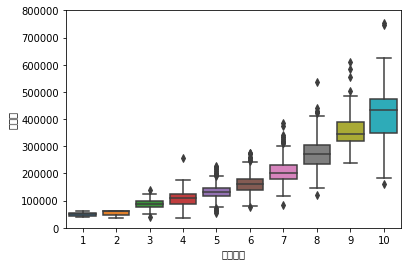

In [21]:
# 通过箱线图，查看离群点
import seaborn as sns

data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) 
fig = sns.boxplot(x='热度指数', y='浏览量', data = data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000)

In [30]:
# 数据清洗
df_ads.isna().sum()
df_ads = df_ads.dropna()

In [31]:
# 构建特征集和标签集
X = df_ads.drop(['浏览量'], axis=1) # 特征集，删除掉标签相关字段
y = df_ads.浏览量                  # 标签集，
print(X.head())
print(y.head())

    点赞数     转发数  热度指数  文章评级
0  2646  1347.0     7     5
1   816   816.0     4     6
2  1224   612.0     6     5
3  1261  1261.0     6     6
4  1720  1720.0     7     5
0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64


In [35]:
# 拆分训练集、验证集、测试集
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=10)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

       点赞数     转发数  热度指数  文章评级
742   2169  1284.0     8     5
759   2229   755.0     6     6
1249  1792   963.0     7     5
1181  2521   942.0     6     4
1203  2515  2035.0     6     3
742     228501
759     104002
1249    231504
1181    151401
1203    200629
Name: 浏览量, dtype: int64
       点赞数     转发数  热度指数  文章评级
150   1768   884.0     7     5
36     988   988.0     5     5
1049  2062  1157.0     7     5
393   1392  1392.0     5     6
1255  1537  1319.0     6     9
150     224904
36      113001
1049    277002
393     121502
1255    174002
Name: 浏览量, dtype: int64


       点赞数     转发数  热度指数  文章评级   浏览量真值         浏览量预测值
150   1768   884.0     7     5  224904  204326.495272
36     988   988.0     5     5  113001  117182.827329
1049  2062  1157.0     7     5  277002  236266.050505
393   1392  1392.0     5     6  121502  166316.290479
1255  1537  1319.0     6     9  174002  206254.835807


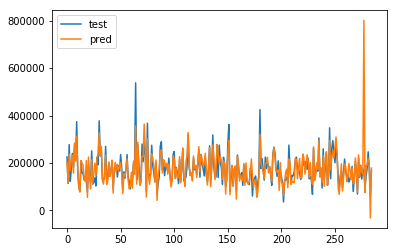

In [46]:
# 建立模型
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
linereg_model = LinearRegression() # 使用线性回归算法创建模型

# 训练模型
linereg_model.fit(X_train, y_train) # 用训练集数据

# 预测测试集的Y值
y_pred = linereg_model.predict(X_test) 

df_ads_pred = X_test.copy()
df_ads_pred['浏览量真值'] = y_test
df_ads_pred['浏览量预测值'] = y_pred
print(df_ads_pred.head())

tick = range(0,len(y_test))
plt.plot(tick, y_test, label='test')
plt.plot(tick, y_pred, label='pred')
plt.legend()
plt.show()

In [48]:
print('当前模型4个特征的权重：',linereg_model.coef_)
print('当前模型的截距：',linereg_model.intercept_)

当前模型4个特征的权重： [   52.4893649     60.46769946 26245.3020327   3498.80914868]
当前模型的截距： -143139.3081655697


In [55]:
print('线性回归预测评分:', linereg_model.score(X_test, y_test))

线性回归预测评分: 0.4189365095307418
